# # https://youtu.be/GRtgLlwxpc4

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D4fVLe4FjFMjjN3ytNW6")
project = rf.workspace("project-vnuod").project("jellyfish-ynd14")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=11375cc7325dfe5ed08f366881a00712f276e59ee8f3b740399ba07f769c26d8
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to jellyfish-1 in yolov5pytorch:: 100%|██████████| 678/678 [00:00<00:00, 2314.28it/s]


# # 필요한 라이브러리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython.display import Image

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


# # 이후 순서
  * 인식할 이미지 수집
    - train_data(폴더)
      + images(폴더)
        * train(폴더)
          - 이미지들 -> makesense.ai 에서 레이블링 혹은 roboflow.com 에서
        * val(폴더)
          - 이미지들 -> makesense.ai 에서 레이블링 혹은 roboflow.com 에서
      + labels(폴더)
        * train(폴더)
          - 레이블링한 txt 파일들
        * val(폴더)
          - 레이블링한 txt 파일들
  * 코랩에 train_data 폴더 zip 파일 업로드

# # 전처리
  * yolov5 - data - coco128.yaml 다운로드
    - 수정
  * custom_data.yaml 로 파일명 변경

# # 훈련
  * coco128.yaml -> custom_data.yaml

In [5]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data /content/jellyfish-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/jellyfish-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s

In [6]:
!python detect.py --weights /content/jellyfish-1/test/images/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg --name jellyfish --save-txt --save-conf

detect: weights=['/content/jellyfish-1/test/images/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=jellyfish, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "detect.py", line 261, in <module>
    main(opt)
  File "detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 98, in run
    model = DetectMultiBackend(weights, device=dev

# # 결과 확인
  * 검증을 위해 다운로드 했던 val 폴더에 있던 이미지를 잘 인식했는지 확인할 수 있다.
    - 훈련 결과 맨 마지막에 
      + Results saved to **runs/train/exp4**

# # 모델이 잘 돌아가는 확인

## ## weights(가중치) 경로 새로 설정
  * 훈련 결과 마지막 즘에 
    - Validating **runs/train/exp3/weights/best.pt**
  * --conf 0.35
    - 정확도 0.25 -> 0.35

### ### 이미지
  * 인식 시킬 이미지를 코랩에 업로드

In [11]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.8 --source /content/jellyfish-1/test/images/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/jellyfish-1/test/images/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.86, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/jellyfish-1/test/images/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg: 640x640 1 jellyfish, 12.6ms
Speed: 0.5ms pre-process, 12.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect

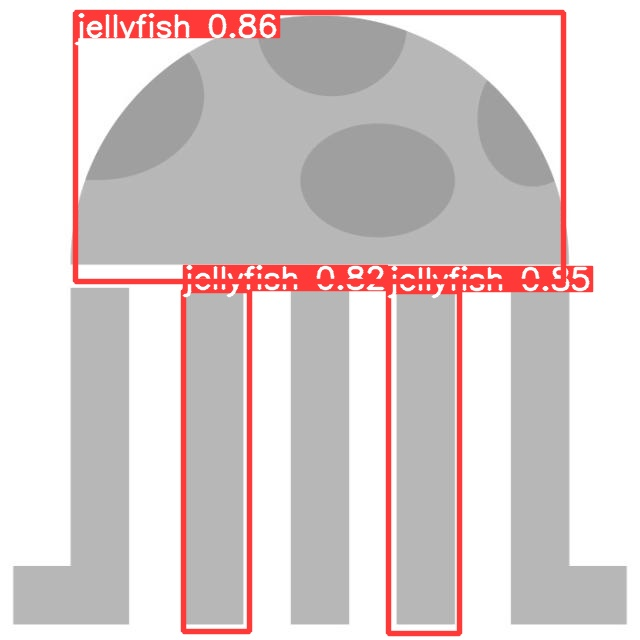

In [10]:
Image('/content/yolov5/runs/detect/exp2/p_0491_18353_542171_jpg.rf.6a226bf8d2f7c9855fb19ddd832fbe5a.jpg')